## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
import os
import random
import matplotlib.pyplot as plt
from tensorflow import keras
np.random.seed(123)
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [2]:
letters_1=pd.read_csv('letters.csv')
letters_1.head()

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0


In [3]:
letters_2=pd.read_csv('letters2.csv')
letters_2.head()
                      

,letter,label,file,background
0,а,1,01_51.png,2
1,а,1,01_52.png,2
2,а,1,01_53.png,2
3,а,1,01_54.png,2
4,а,1,01_55.png,2


In [4]:
letters_3=pd.read_csv('letters3.csv')
letters_3.head()

,letter,label,file,background
0,а,1,01_231.png,3
1,а,1,01_232.png,3
2,а,1,01_233.png,3
3,а,1,01_234.png,3
4,а,1,01_235.png,3


In [5]:
letters_1.corr()

,label,background
label,1.000000e+00,-6.918602e-16
background,-6.918602e-16,1.000000e+00


## EDA

In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [12]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# letters.csv has 1650 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('letters.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'letters.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


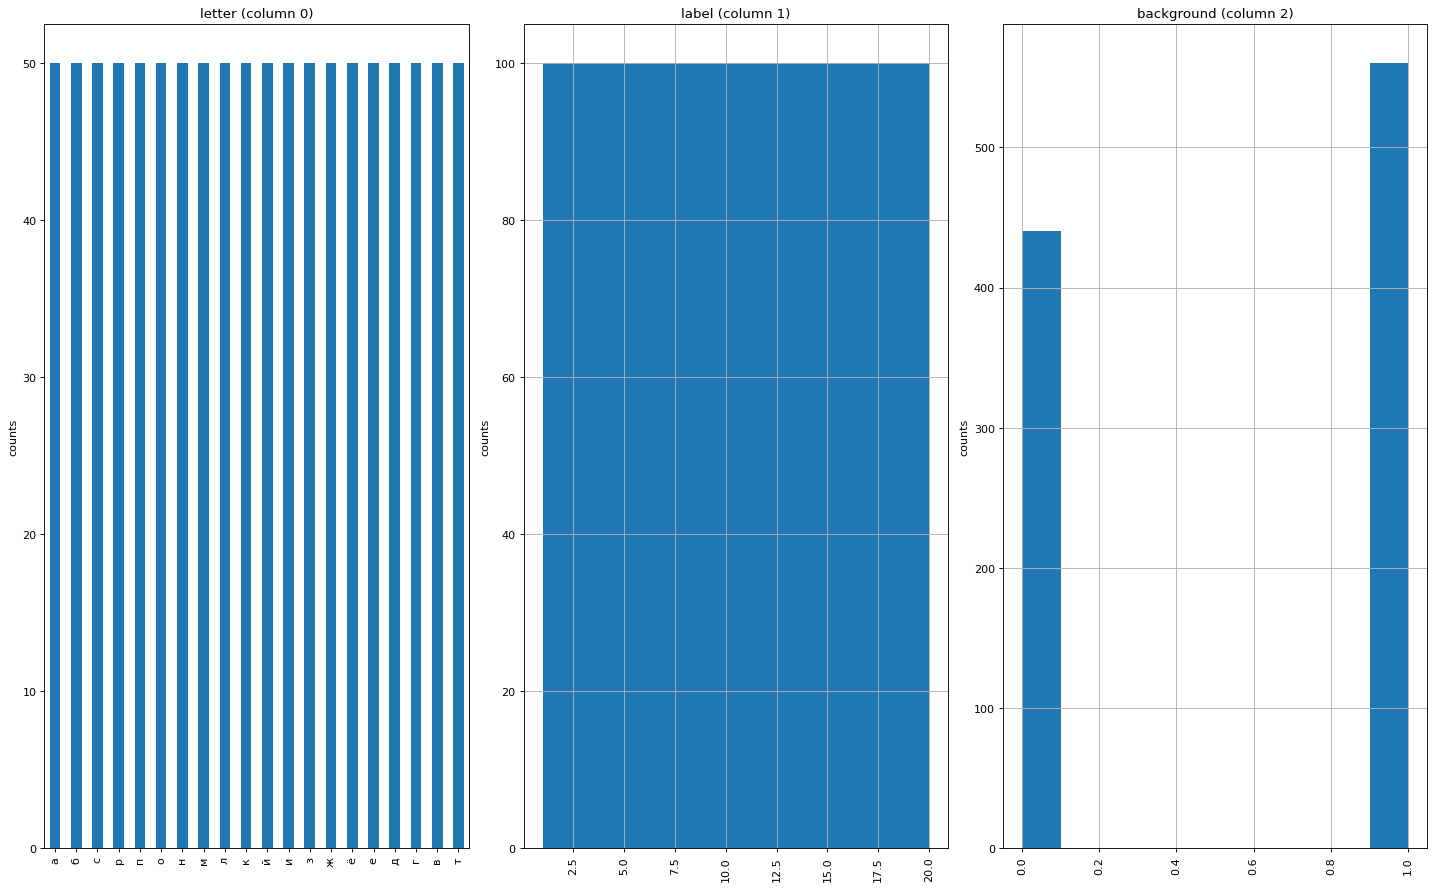

In [13]:
plotPerColumnDistribution(df1, 10, 5)

/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


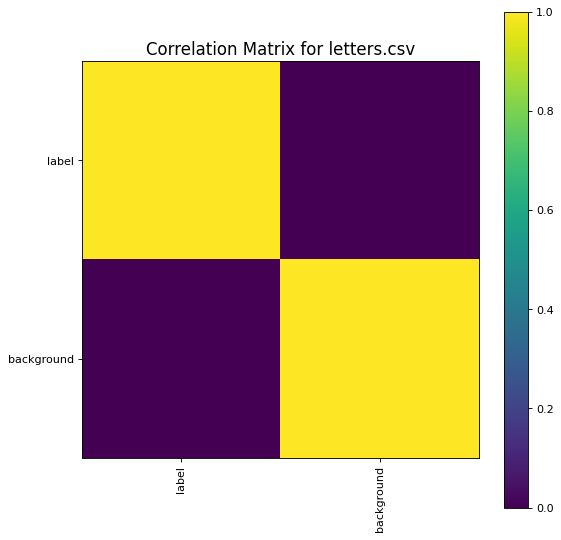

In [14]:
plotCorrelationMatrix(df1, 8)

In [19]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# letters2.csv has 5940 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('letters2.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'letters2.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


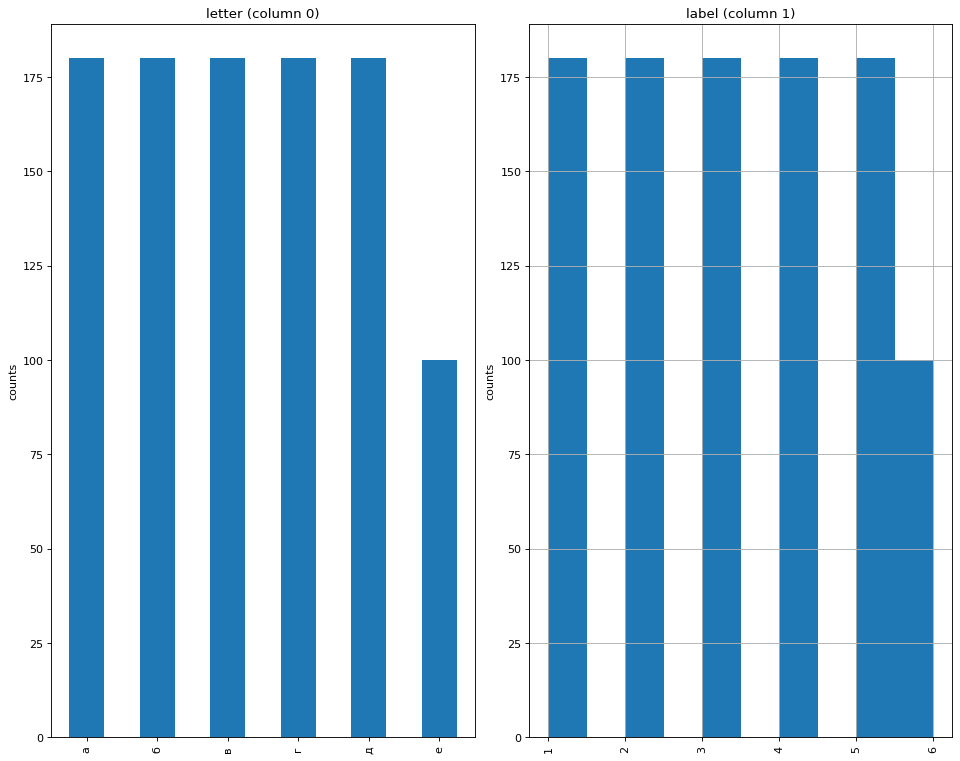

In [20]:
plotPerColumnDistribution(df2, 10, 5)

/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


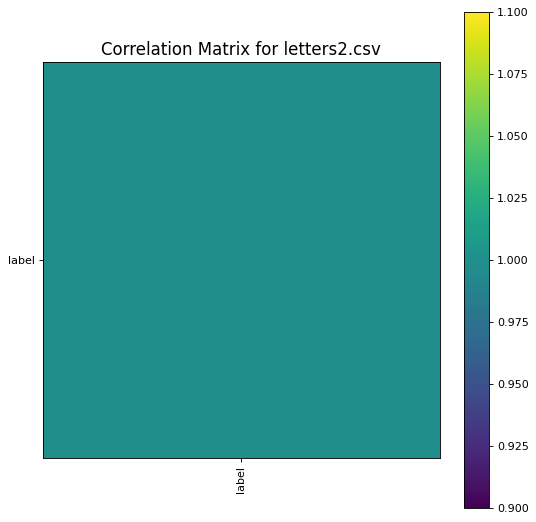

In [21]:
plotCorrelationMatrix(df2, 8)

In [22]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# letters3.csv has 6600 rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('letters3.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'letters3.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


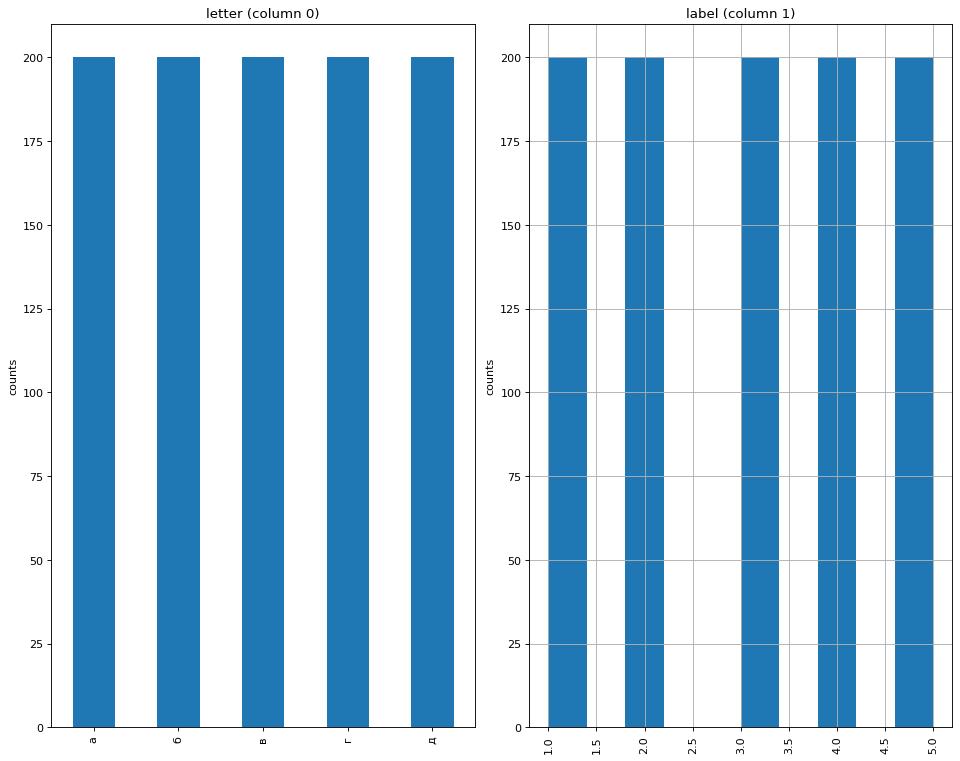

In [23]:
plotPerColumnDistribution(df3, 10, 5)

/var/folders/y_/nn87538d2sqd7jdp7rqkjnmw0000gn/T/ipykernel_23320/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


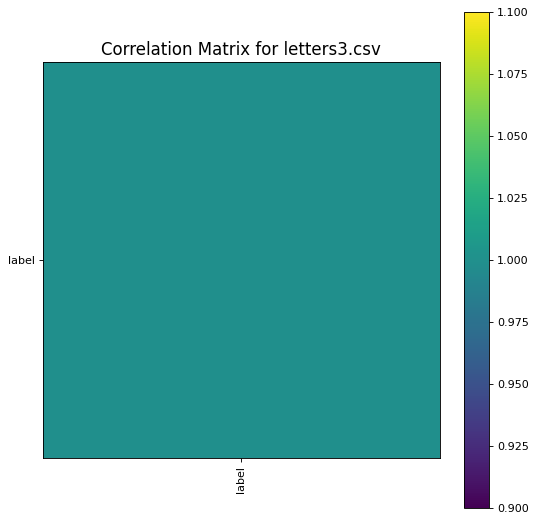

In [24]:
plotCorrelationMatrix(df3, 8)

## Here we are creating a function for Transformer Mixin: To convert categorical variables in a consistent way across train and test datasets

In [25]:
from sklearn.base import TransformerMixin
class CustomStandardScalerForCnn(TransformerMixin):
    def __init__(self, with_mean=True, with_std=True):
        self.with_mean = with_mean
        self.with_std = with_std
        self.mean_ = None
        self.std_ = None
        
    def fit(self, X, y=None):
        if self.with_mean:
            self.mean_ = X.mean()
        else:
            self.mean_ = 0
            
        if self.with_std:
            self.std_ = X.std()
        else:
            self.std_ = 1
        
        return self
    
    def transform(self, X):
        if self.mean_ and self.std_:
            return (X - self.mean_) / self.std_
        else:
            raise("CustomStandardScalerForCnn is not fitted")
            
    def inverse_transform(self, X):
        if self.with_std:
            X *= self.std_
        if self.with_mean:
            X += self.mean_
        return X

## Sequential Model , setting parameters

In [47]:
def CNN_Model():
    clf = keras.models.Sequential([
        keras.layers.ZeroPadding2D((1,1), input_shape=(32, 32, 3)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.ZeroPadding2D((1,1)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)), # stride=2
        keras.layers.ZeroPadding2D((1,1)),
        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        keras.layers.ZeroPadding2D((1,1)),
        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)), # stride=2
        keras.layers.ZeroPadding2D((1,1)),
        keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        keras.layers.ZeroPadding2D((1,1)),
        keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)), # stride=2
        keras.layers.Flatten(),
        keras.layers.Dense(2048, activation='relu'),
        keras.layers.Dropout(0.75),
        keras.layers.Dense(2048, activation='relu'),
        keras.layers.Dropout(0.75),
        keras.layers.Dense(33, activation='softmax')
    ])
    
    
    clf.compile(optimizer=keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return clf


In [28]:
def plot_data(img_array, labels_array, n_samples=5):
    classes = set(labels_array)
    fig, ax = plt.subplots(len(classes), n_samples)
    
    for label_idx, class_label in enumerate(classes):
        data = img_array[labels_array == class_label]
        samples_from_class = random.choices(data, k=n_samples)
        for i, img in enumerate(samples_from_class):
            ax[label_idx, i].imshow(img)
            ax[label_idx, i].axis('off')

In [56]:
letters1 = pd.read_csv( 'letters.csv')
letters1['folder_name'] = 'letters'
letters2 = pd.read_csv( 'letters2.csv')
letters2['folder_name'] = 'letters2'
letters3 = pd.read_csv( 'letters3.csv')
letters3['folder_name'] = 'letters3'
letters = pd.concat([letters1, letters2, letters3], ignore_index=True)

letters.head()


,letter,label,file,background,folder_name
0,а,1,01_01.png,0,letters
1,а,1,01_02.png,0,letters
2,а,1,01_03.png,0,letters
3,а,1,01_04.png,0,letters
4,а,1,01_05.png,0,letters


## Importing CV2 to process the images

In [57]:
import cv2
X = []
y = []
for i, row in letters.iterrows():
    folder_name = row['folder_name']
    img_name = row['file']
    img_arr = cv2.imread(folder_name+"/"+img_name)
    if img_arr.shape == (32, 32, 3):
        X.append(img_arr)
        y.append(row['letter'])

X = np.array(X)
y = np.array(y)
X.shape, y.shape

((14178, 32, 32, 3), (14178,))

## Fitting CNN

In [48]:
model = Pipeline([
    ('scaler', CustomStandardScalerForCnn()),
    ('keras', keras.wrappers.scikit_learn.KerasClassifier(CNN_Model,
                                                          epochs=40,
                                                          batch_size=128,
                                                          validation_split=0.1,
                                                          callbacks=[
                                                              keras.callbacks.EarlyStopping(patience=5),
                                                              keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                                                factor=0.5, patience=3,
                                                                                                verbose=1, min_lr=0)
                                                                    ],             
                                                          verbose=1))
])

print(CNN_Model().summary())
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

history=model.fit(x_train, y_train)
history


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_12 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)      

Pipeline(steps=[('scaler',
                 <__main__.CustomStandardScalerForCnn object at 0x15eb31520>),
                ('keras',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x15eb31670>)])

## Model Evaluation

In [49]:
print('score on train data:', model.score(x_train, y_train))
print('score on test data:', model.score(x_test, y_test))
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

84/84 [==============================] - 43s 513ms/step - loss: 0.0326 - accuracy: 0.9929
score on train data: 0.9928524494171143
28/28 [==============================] - 17s 603ms/step - loss: 0.2239 - accuracy: 0.9422
score on test data: 0.9421720504760742
              precision    recall  f1-score   support

           а       0.94      0.90      0.92       107
           б       0.95      1.00      0.97       107
           в       0.96      0.93      0.94       107
           г       0.93      0.93      0.93       107
           д       0.99      0.92      0.95       107
           е       0.93      0.95      0.94       108
           ж       0.90      0.93      0.91       107
           з       0.97      0.98      0.98       108
           и       0.85      0.87      0.86       108
           й       1.00      0.98      0.99       108
           к       0.97      0.89      0.93       108
           л       0.95      0.98      0.97       108
           м       0.98      0.97     

In [54]:
model.score(x_test,y_test)

28/28 [==============================] - 13s 467ms/step - loss: 0.2239 - accuracy: 0.9422


0.9421720504760742